# Dynamic Programming (DP) - 动态规划

## 1、何时采用动态规划
整个数组或在固定大小的滑动窗口中找到总和或最大值或最小值的问题可以通过动态规划（DP）在线性时间内解决。

## 2、动态规划解题步骤
总体上分为四步：定义状态、状态转移方程、初始化、输出

### 2.1 定义状态
什么状态好转移就定义什么状态。 常见的状态定义方法：
一维动态规划：

    （1） dp[i]定义为数组前i个元素的最值或者总和
    
    （2） dp[i]表示以nums[i]作为结尾元素的最值或总和

二维动态规划：

    （1） dp[i][j]定义为数组或字符串从nums[i…j]之间的最值
    
    （2） dp[i][j]定义为以nums[i]开始并且以nums[j]结尾的子数组的最值
 
    （3） dp[i][j]定义为两个数组分别以nums[i]和nums[j]结尾的最值
   
    （4） dp[i][j]在01背包问题中表示添加前i个数值后剩余的容量为j
### 2.2 状态转移方程
### 2.3 初始化
### 2.4 输出

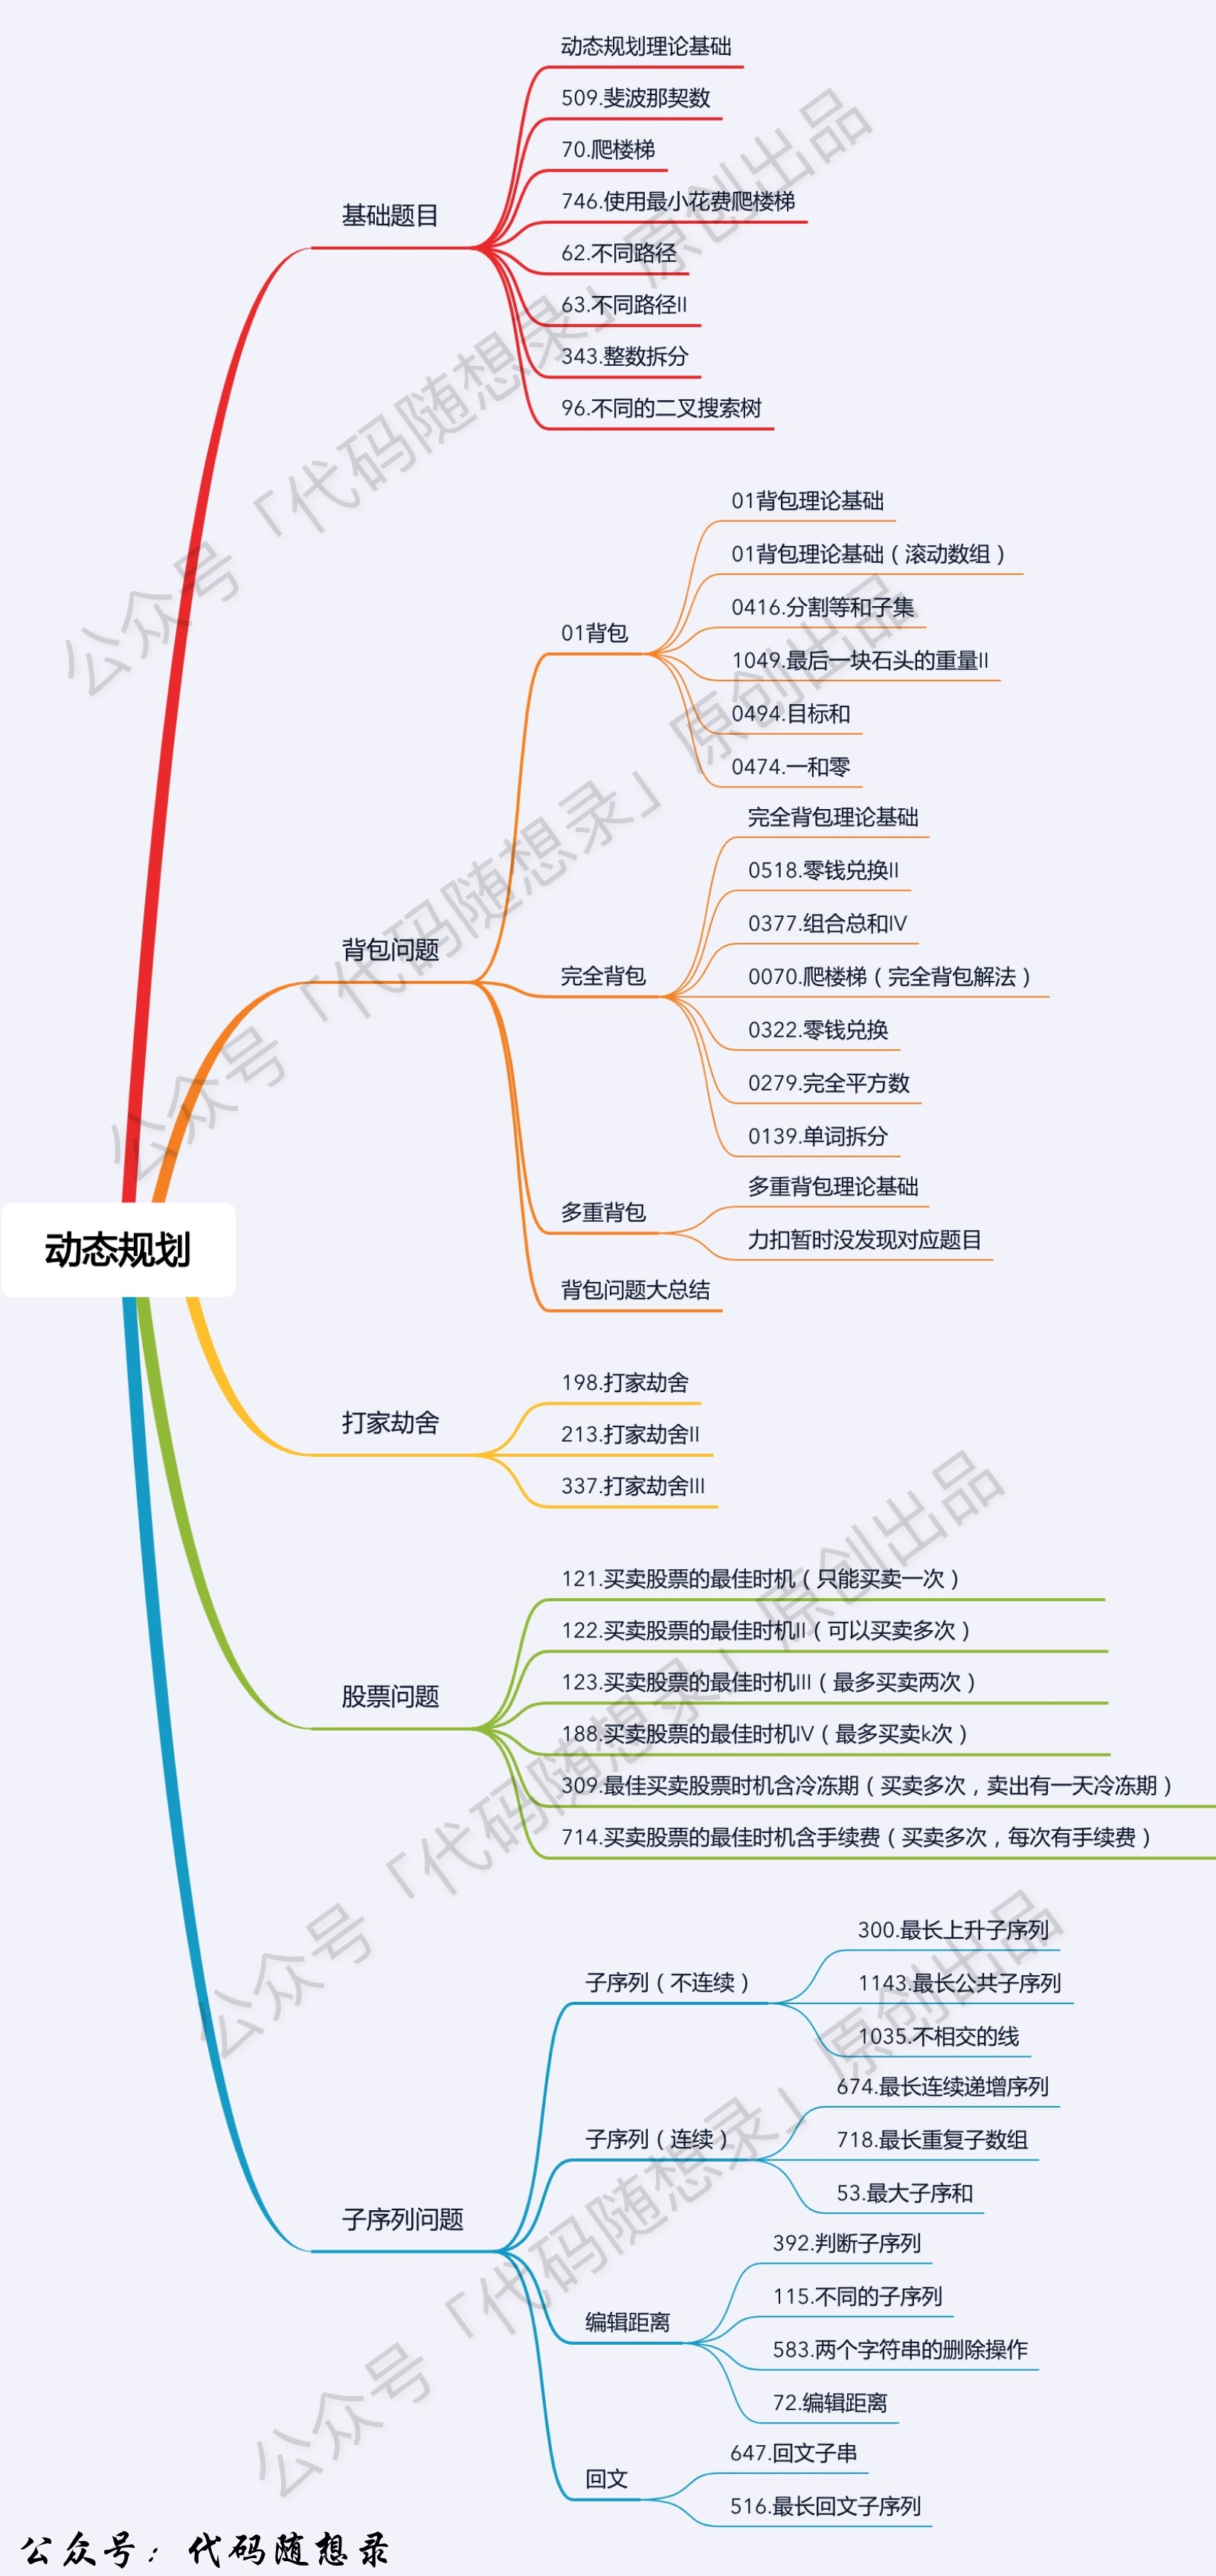

## 3、01背包问题

### 问题定义：

有N个物品，物品有两个属性，重量（或体积）$w_i$，价值$v_i$ ，有背包承重（或总空间）为W。 要求从这些物品中挑选出总重量不超过W的物品, 求所有挑选方案中价值总和的最大值. 每件物品都只有一件，要么进背包，要么不进，顾名思义为01背包， 注意价值，可以是其他，如Bool变量。

### 状态定义
我们定义dp函数为：$dp[i][j]$,  在 1 ~ j这i个物品中挑选（或全选）， 使背包剩余容量为j, 此时获得最大价值。<br/>
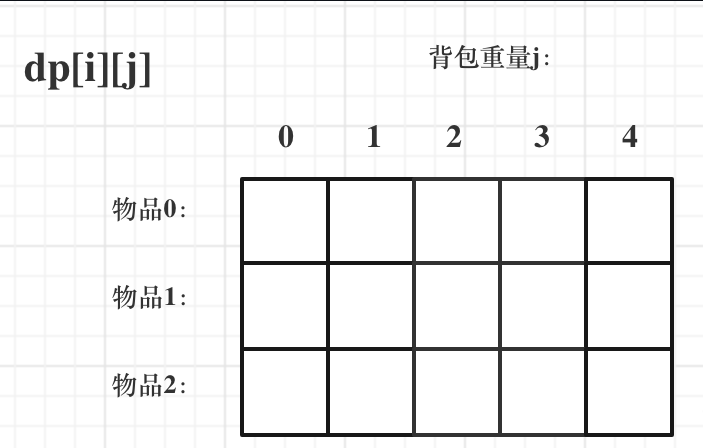


根据是否要求背包满载，分为两种情况，

1. 在背包满载的情况下，所能取得的最大价值是多少
2. 在背包可以不满载的情况下，所能取得的最大价值是多少

动态规划的核心是问题的分解，将复杂问题分解为有限个子问题（重叠子问题），求解子问题的最优解（最优子结构），然后通过状态方程将子问题和父问题联系起来。

根据子问题的结构$dp[i][j]$, 如何将这个子问题和父问题联系起来呢？ 观察$dp[i][j]$是如何构成的。面对第i个物品，背包剩余容量为j， 有两种行为模式：
1. Select: 那么第i-1的最优解加上第i个的价值（此时注意，剩余重量要改变，即第i-1是在扣除了i的空间后的价值，也就是$j -w_i$)，就是拿了第i个的最优解！即拿第i个物品， 最优解为：
   $$  dp[i - 1] [j-w_i] + v_i$$
   
3. Not Select: 那么就是第$i-1$的最优解。此时的j可能需要根据题意来判断了，要求装满或者无要求。即不拿第i个物品，最优解为：

   $$dp[i-1][j]$$

### 状态方程
$$y =\begin{cases} 0  & i=0\\ dp[i-i][j] & j<w_i \\ max(dp[i-1][j],  dp[i-1][j-w_i] + v_i)  & normal\end{cases}$$	

这里，第一个条件是初始化条件。 第二个条件是物品重量超过目标背包的情况。 第三个条件是正常状态转移的方程。
### 解法归纳
from: https://www.bilibili.com/video/BV1K4411X766/?spm_id_from=333.337.search-card.all.click

一、如果无法装下该物品， 那么前n个物品的最佳组合和前n-1个物品的最佳组合是一样的。

二、如果装得下当前物品。

假设1： 装当前物品， 在给当前物品预留了相应的空间的情况下， 前n-1个物品的最佳组合加上当前物品的价值就是总价值。

假设2： 不装当前物品，那么前n个物品的最佳组合和前n-1个物品的最佳组合是一样的。选

取假设1和假设2中较大的价值，为当前组合的价值。

回溯归纳：
从表的右下角开始回溯， 如果发现前n个物品的最佳组合和价值和前n-1个物品的最佳组合和价值一样，说明第n个物品没有被装入，否则，第n个物品被装入：
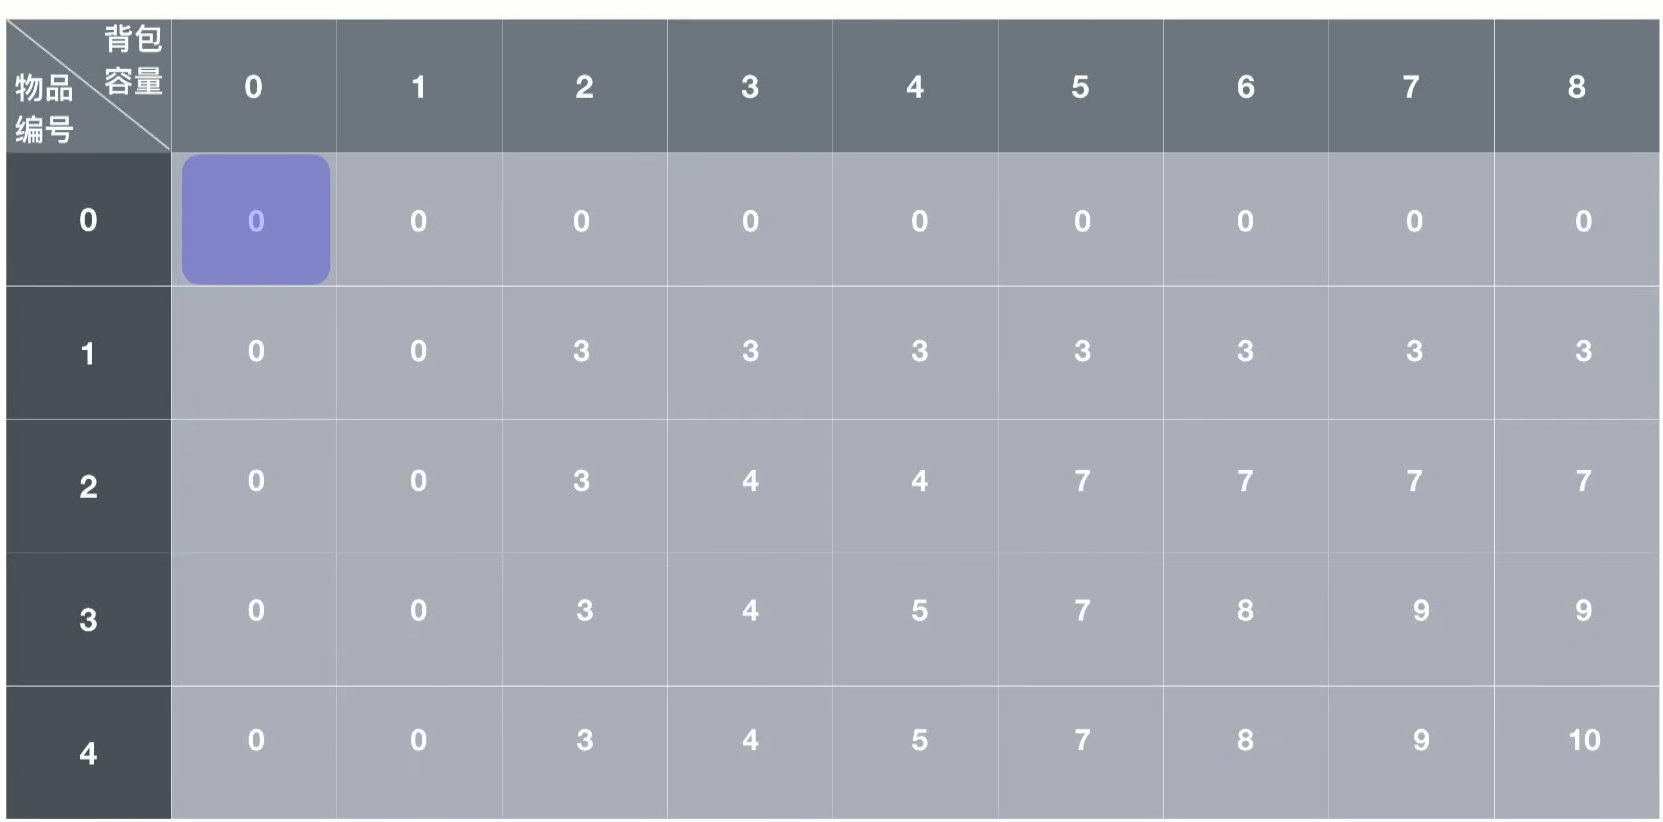

注意：dp的初始大小的维度应当为$(n+1) \times (w+1)$

01背包问题题目： 
494. 目标和 https://leetcode-cn.com/problems/target-sum/    <br/>
474. 一和零 https://leetcode-cn.com/problems/ones-and-zeroes/   <br/>
1049. 最后一块石头的重量 II https://leetcode-cn.com/problems/last-stone-weight-ii/  <br/>
416. 分割等和子集 https://leetcode.cn/problems/partition-equal-subset-sum/ <br/>
<br/>
<br/>
<br/>

In [12]:
### from https://github.com/youngyangyang04/leetcode-master/blob/master/problems/%E8%83%8C%E5%8C%85%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%8001%E8%83%8C%E5%8C%85-1.md

### 代码实例1
def test_2_wei_bag_problem1():
    weight = [1, 3, 4]
    value = [15, 20, 30]
    bagweight = 4

    # 二维数组
    dp = [[0] * (bagweight + 1) for _ in range(len(weight))]

    # 初始化
    for j in range(weight[0], bagweight + 1):
        dp[0][j] = value[0]

    # weight数组的大小就是物品个数
    for i in range(1, len(weight)):  # 遍历物品
        for j in range(bagweight + 1):  # 遍历背包容量
            if j < weight[i]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weight[i]] + value[i])

    print(dp[len(weight) - 1][bagweight])

test_2_wei_bag_problem1()

### 代码实例2
def test_2_wei_bag_problem1(weight, value, bagweight):
    # 二维数组
    dp = [[0] * (bagweight + 1) for _ in range(len(weight))]

    # 初始化
    for j in range(weight[0], bagweight + 1):
        dp[0][j] = value[0]

    # weight数组的大小就是物品个数
    for i in range(1, len(weight)):  # 遍历物品
        for j in range(bagweight + 1):  # 遍历背包容量
            if j < weight[i]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weight[i]] + value[i])

    return dp[len(weight) - 1][bagweight]

if __name__ == "__main__":

    weight = [1, 3, 4]
    value = [15, 20, 30]
    bagweight = 4

    result = test_2_wei_bag_problem1(weight, value, bagweight)
    print(result)

1 15 15
2 15 15
3 15 15
4 15 15
35
35


# Q1: 携带研究材料
Link: https://kamacoder.com/problempage.php?pid=1046

题目描述

小明是一位科学家，他需要参加一场重要的国际科学大会，以展示自己的最新研究成果。他需要带一些研究材料，但是他的行李箱空间有限。这些研究材料包括实验设备、文献资料和实验样本等等，它们各自占据不同的空间，并且具有不同的价值。 

小明的行李空间为 N，问小明应该如何抉择，才能携带最大价值的研究材料，每种研究材料只能选择一次，并且只有选与不选两种选择，不能进行切割。

输入描述
第一行包含两个正整数，第一个整数 M 代表研究材料的种类，第二个正整数 N，代表小明的行李空间。

第二行包含 M 个正整数，代表每种研究材料的所占空间。 

第三行包含 M 个正整数，代表每种研究材料的价值。

输出描述

输出一个整数，代表小明能够携带的研究材料的最大价值。

输入示例

>6 1
>
>2 2 3 1 5 2
>
>2 3 1 5 4 3

输出示例
5

提示信息

小明能够携带 6 种研究材料，但是行李空间只有 1，而占用空间为 1 的研究材料价值为 5，所以最终答案输出 5。 

数据范围：

>1 <= N <= 5000
>
>1 <= M <= 5000


研究材料占用空间和价值都小于等于 1000

In [49]:
def bag_issue_01(bag, weight, value):
    space, bagweight = bag[0], bag[1]
    dp = [[0] * (bagweight + 1) for _ in range(space)]

    # 初始化过程中 会将第一行即第1个item的，对应的可装空间都填为对应的value值。
    for j in range(weight[0],  bagweight + 1):  
        dp[0][j] =value[0]
    print(dp)
        
    for i in range(1, space):
        for j in range(bagweight + 1):
            if j < weight[i]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i-1][j - weight[i]] + value[i])
    return dp[-1][-1]


#this part is for code commit online
#bag = list(map(int, input().split()))
#weight = list(map(int, input().split()))
#value = list(map(int, input().split()))
#print(bag_issue_01(bag, weight, value))

#this par is used for local debug
if __name__ == "__main__":
    bag = [6, 5] #一行包含两个正整数，第一个整数 M 代表研究材料的种类，第二个正整数 N，代表小明的行李空间。
    weight = [2, 2, 3, 1, 5, 2] # 第二行包含 M 个正整数，代表每种研究材料的所占空间。
    value = [2, 3, 1, 5, 4, 3] #第三行包含 M 个正整数，代表每种研究材料的价值。
    result = bag_issue_01(bag, weight, value)
    print(result)

[[0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
11


# Q2 494. 目标和 
https://leetcode-cn.com/problems/target-sum/

给你一个非负整数数组 nums 和一个整数 target 。

向数组中的每个整数前添加 '+' 或 '-' ，然后串联起所有整数，可以构造一个 表达式 ：

例如，nums = [2, 1] ，可以在 2 之前添加 '+' ，在 1 之前添加 '-' ，然后串联起来得到表达式 "+2-1" 。
返回可以通过上述方法构造的、运算结果等于 target 的不同 表达式 的数目。

 

示例 1：<br/>

输入：nums = [1,1,1,1,1], target = 3 <br/>
输出：5<br/>
解释：一共有 5 种方法让最终目标和为 3 。<br/>
-1 + 1 + 1 + 1 + 1 = 3<br/>
+1 - 1 + 1 + 1 + 1 = 3<br/>
+1 + 1 - 1 + 1 + 1 = 3<br/>
+1 + 1 + 1 - 1 + 1 = 3<br/>
+1 + 1 + 1 + 1 - 1 = 3<br/>
示例 2：<br/>

输入：nums = [1], target = 1 <br/>
输出：1<br/>
 

Analysis:
Nums中所有元素和为$s$ 添加符号部分的元素和为 $x$, 目标为target. 那么：
$$
\begin{align}
target = （s - x） - x \\ 
target = s - 2x \\ 
x = (s - target) / 2\\
2x = s - target
\end{align}
$$

所以有两个前提条件：
1.  因为x为正数， 所以: $s - target >= 0$,  即$s > target$ ， 输入错误则返回0。
2.  因为有2x，所以s - taget必须为偶数， 奇数返回为空。

问题转换： nums中的元素， 从中找到和为 (s - target) / 2，即背包重量。

In [96]:
def findTargetSumWays(nums, target):
    total = sum(nums)
    if total < target or (total - target) % 2:
        return 0
        
    items, bagweight = len(nums),  (total - target) // 2

    dp = [[0] * (bagweight + 1) for _ in range(items + 1)]
    dp[0][0] = 1 # 初始化中 第0个item对应weigh是0 必然是1.
    for i, value in enumerate(nums, 1):
        for j in range(bagweight + 1):
            dp[i][j] = dp[i - 1][j]  #首先集成上一轮的值
            if j >= value:           #如果空间还足够 那么需要更新. dp[i][j]是当前的value.
                dp[i][j] += dp[i-1][j - value]
    return dp[-1][-1]

nums = [1,1,1,1,1]
target = 3
print(findTargetSumWays(nums, target))

5


In [97]:
# Commit code
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        total = sum(nums)
        if total < target or (total - target) % 2:
            return 0
            
        items, bagweight = len(nums),  (total - target) // 2
    
        dp = [[0] * (bagweight + 1) for _ in range(items + 1)]
        dp[0][0] = 1 # 初始化中 第0个item对应weigh是0 必然是1.
        for i, value in enumerate(nums, 1):
            for j in range(bagweight + 1):
                dp[i][j] = dp[i - 1][j]  #首先集成上一轮的值
                if j >= value:           #如果空间还足够 那么需要更新. dp[i][j]是当前的value.
                    dp[i][j] += dp[i-1][j - value]
        return dp[-1][-1]

NameError: name 'List' is not defined

# Q3 474. 一和零 
https://leetcode-cn.com/problems/ones-and-zeroes/

给你一个二进制字符串数组 strs 和两个整数 m 和 n 。

请你找出并返回 strs 的最大子集的长度，该子集中 最多 有 m 个 0 和 n 个 1 。

如果 x 的所有元素也是 y 的元素，集合 x 是集合 y 的 子集 。

 

示例 1：

输入：strs = ["10", "0001", "111001", "1", "0"], m = 5, n = 3   <br/>
输出：4 <br/>
解释：最多有 5 个 0 和 3 个 1 的最大子集是 {"10","0001","1","0"} ，因此答案是 4 。  <br/>
其他满足题意但较小的子集包括 {"0001","1"} 和 {"10","1","0"} 。{"111001"} 不满足题意，因为它含 4 个 1 ，大于 n 的值 3 。<br/>
示例 2：<br/>

输入：strs = ["10", "0", "1"], m = 1, n = 1 <br/>
输出：2 <br/>
解释：最大的子集是 {"0", "1"} ，所以答案是 2 。<br/>

In [109]:
def findMaxForm(strs, m, n):
    if len(strs) == 0:
        return 0

    dp = [[0] * (n + 1) for _ in range(m+1)]
    
    for item in strs:
        zeros = item.count("0")
        ones = item.count("1")
        for i in range(m, zeros -1,  -1):
            for j in range(n, ones -1, -1):
                dp[i][j] = max(dp[i][j], dp[i-zeros][j - ones] + 1)            
    return dp[-1][-1]

strs = ["10", "0001", "111001", "1", "0"]
m = 5
n = 3
print(findMaxForm(strs, m, n))

4


In [ ]:
class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        if len(strs) == 0:
            return 0
    
        dp = [[0] * (n + 1) for _ in range(m+1)]
        
        for item in strs:
            zeros = item.count("0")
            ones = item.count("1")
            for i in range(m, zeros -1,  -1):
                for j in range(n, ones -1, -1):
                    dp[i][j] = max(dp[i][j], dp[i-zeros][j - ones] + 1)            
        return dp[-1][-1]

# Q4 1049. 最后一块石头的重量 II 
https://leetcode-cn.com/problems/last-stone-weight-ii/

有一堆石头，用整数数组 stones 表示。其中 stones[i] 表示第 i 块石头的重量。

每一回合，从中选出任意两块石头，然后将它们一起粉碎。假设石头的重量分别为 x 和 y，且 x <= y。那么粉碎的可能结果如下：

如果 x == y，那么两块石头都会被完全粉碎；<br/>
如果 x != y，那么重量为 x 的石头将会完全粉碎，而重量为 y 的石头新重量为 y-x。<br/>
最后，最多只会剩下一块 石头。返回此石头 最小的可能重量 。如果没有石头剩下，就返回 0。<br/>

 

示例 1：

输入：stones = [2,7,4,1,8,1]<br/>
输出：1<br/>
解释：<br/>
组合 2 和 4，得到 2，所以数组转化为 [2,7,1,8,1]，<br/>
组合 7 和 8，得到 1，所以数组转化为 [2,1,1,1]，<br/>
组合 2 和 1，得到 1，所以数组转化为 [1,1,1]，<br/>
组合 1 和 1，得到 0，所以数组转化为 [1]，这就是最优值。<br/>
示例 2：<br/>

输入：stones = [31,26,33,21,40]<br/>
输出：5<br/>

In [119]:
"""
dp[j] 背包容量为j, 最大价值（最大重量）dp[j].
"""
def lastStoneWeightII(stones):
    n = len(stones)
    total = sum(stones)
    target = total // 2
    dp = [0] * (target + 1)
    for i in range(n):
        for j in range(target, stones[i] - 1, -1):
            dp[j] = max(dp[j], dp[j - stones[i]] + stones[i])
    return abs(dp[target] - (total - dp[target]))
    
stones = [31,26,33,21,40]
print(lastStoneWeightII(stones))

5


In [ ]:
class Solution:
    def lastStoneWeightII(self, stones: List[int]) -> int:
        n = len(stones)
        total = sum(stones)
        target = total // 2
        dp = [0] * (target + 1)
        for i in range(n):
            for j in range(target, stones[i] - 1, -1):
                dp[j] = max(dp[j], dp[j - stones[i]] + stones[i])
        return abs(dp[target] - (total - dp[target]))

# Q5 416. 分割等和子集 
https://leetcode.cn/problems/partition-equal-subset-sum/

给你一个 只包含正整数 的 非空 数组 nums 。请你判断是否可以将这个数组分割成两个子集，使得两个子集的元素和相等。

 

示例 1：

输入：nums = [1,5,11,5] <br/>
输出：true <br/>
解释：数组可以分割成 [1, 5, 5] 和 [11] 。<br/>
示例 2：<br/>

输入：nums = [1,2,3,5]<br/>
输出：false<br/>
解释：数组不能分割成两个元素和相等的子集。<br/>

In [132]:
def canPartition(nums):
    sums = sum(nums)
    if sums % 2:
        return False
    target = sums // 2
    
    dp = [[False] * (target + 1) for _ in range(len(nums))]

    
    dp[0][0] = True
    for i in range(1, target + 1):
        if nums[0] == i:
            dp[0][i] = True
            break

    for i in range(1, len(nums)):
        for j in range(target + 1):
            if j >= nums[i]:
                dp[i][j] = dp[i - 1][j] or dp[i-1][j-nums[i]]
            else:
                dp[i][j] = dp[i-1][j]
    return dp[-1][-1]

nums =  [1,2,3,5]
print(canPartition(nums))

False


In [ ]:
class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        sums = sum(nums)
        if sums % 2:
            return False
        target = sums // 2
        
        dp = [[False] * (target + 1) for _ in range(len(nums))]
    
        
        dp[0][0] = True
        for i in range(1, target + 1):
            if nums[0] == i:
                dp[0][i] = True
                break
    
        for i in range(1, len(nums)):
            for j in range(target + 1):
                if j >= nums[i]:
                    dp[i][j] = dp[i - 1][j] or dp[i-1][j-nums[i]]
                else:
                    dp[i][j] = dp[i-1][j]
        return dp[-1][-1]

# 4. 基础题目

## Q6: 509. 斐波那契数
https://leetcode.cn/problems/fibonacci-number/description/ <br/>
斐波那契数 （通常用 F(n) 表示）形成的序列称为 斐波那契数列 。该数列由 0 和 1 开始，后面的每一项数字都是前面两项数字的和。也就是：<br/>

F(0) = 0，F(1) = 1<br/>
F(n) = F(n - 1) + F(n - 2)，其中 n > 1<br/>
给定 n ，请计算 F(n) 。<br/>

 

示例 1：<br/>

输入：n = 2<br/>
输出：1<br/>
解释：F(2) = F(1) + F(0) = 1 + 0 = 1<br/>
示例 2：<br/>

输入：n = 3<br/>
输出：2<br/>
解释：F(3) = F(2) + F(1) = 1 + 1 = 2<br/>
示例 3：<br/>

输入：n = 4<br/>
输出：3<br/>
解释：F(4) = F(3) + F(2) = 2 + 1 = 3<br/>
 

In [134]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    res = [0, 1]
    for i in range(2, n+1):
        res[0], res[1] = res[1], res[0] + res[1]
    return res[1]

n = 4
print(fib(n))

3


In [ ]:
class Solution:
    def fib(self, n: int) -> int:
        if n == 0:
            return 0
        if n == 1:
            return 1
        res = [0, 1]
        for i in range(2, n+1):
            res[0], res[1] = res[1], res[0] + res[1]
        return res[1]

## Q7: 70. 爬楼梯  
https://leetcode.cn/problems/climbing-stairs/description/

> 假设你正在爬楼梯。需要 n 阶你才能到达楼顶。
> 
> 每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？
> 
>  
> 
> 示例 1：
> 
> 输入：n = 2
> 输出：2
> 解释：有两种方法可以爬到楼顶。
> 1. 1 阶 + 1 阶
> 2. 2 阶
> 示例 2：
> 
> 输入：n = 3
> 输出：3
> 解释：有三种方法可以爬到楼顶。
> 1. 1 阶 + 1 阶 + 1 阶
> 2. 1 阶 + 2 阶
> 3. 2 阶 + 1 阶

In [137]:
def climbStairs(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    res = [1, 1]
    for i in range(2, n+1):
        res[0], res[1] = res[1], res[0] + res[1]
    return res[1]

n = 2
print(climbStairs(n))

2


In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 0:
            return 1
        if n == 1:
            return 1
        res = [1, 1]
        for i in range(2, n+1):
            res[0], res[1] = res[1], res[0] + res[1]
        return res[1]

## Q8: 746. 使用最小花费爬楼梯
https://leetcode.cn/problems/min-cost-climbing-stairs/description/
> 
> 给你一个整数数组 cost ，其中 cost[i] 是从楼梯第 i 个台阶向上爬需要支付的费用。一旦你支付此费用，即可选择向上爬一个或者两个台阶。
> 
> 你可以选择从下标为 0 或下标为 1 的台阶开始爬楼梯。
> 
> 请你计算并返回达到楼梯顶部的最低花费。
> 
>  
> 
> 示例 1：
> 
> 输入：cost = [10,15,20]
> 输出：15
> 解释：你将从下标为 1 的台阶开始。
> - 支付 15 ，向上爬两个台阶，到达楼梯顶部。
> 总花费为 15 。
> 示例 2：
> 
> 输入：cost = [1,100,1,1,1,100,1,1,100,1]
> 输出：6
> 解释：你将从下标为 0 的台阶开始。
> - 支付 1 ，向上爬两个台阶，到达下标为 2 的台阶。
> - 支付 1 ，向上爬两个台阶，到达下标为 4 的台阶。
> - 支付 1 ，向上爬两个台阶，到达下标为 6 的台阶。
> - 支付 1 ，向上爬一个台阶，到达下标为 7 的台阶。
> - 支付 1 ，向上爬两个台阶，到达下标为 9 的台阶。
> - 支付 1 ，向上爬一个台阶，到达楼梯顶部。
> 总花费为 6 。

> 提示：
>
> 2 <= cost.length <= 1000
> 
> 0 <= cost[i] <= 999

In [149]:
def minCostClimbingStairs(cost):
    n = len(cost)
    minCost = [0] * n
    minCost[1] = min(cost[0], cost[1])
    for i in range(2, n):
        minCost[i] = min(minCost[i - 1] + cost[i], minCost[i-2] + cost[i - 1])

    return minCost[-1]

cost = [1,100,1,1,1,100,1,1,100,1] 
print(minCostClimbingStairs(cost))

6


In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        n = len(cost)
        minCost = [0] * n
        minCost[1] = min(cost[0], cost[1])
        for i in range(2, n):
            minCost[i] = min(minCost[i - 1] + cost[i], minCost[i-2] + cost[i - 1])
    
        return minCost[-1]

## Q9: 62. 不同路径
https://leetcode.cn/problems/unique-paths/description/

>一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。
>
>机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。
>
>问总共有多少条不同的路径？
>
>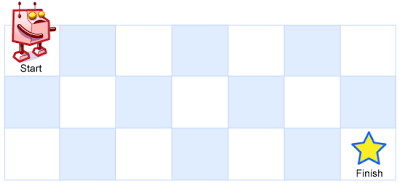
>
>示例 1：
>
>输入：m = 3, n = 7
>输出：28
>示例 2：
>
>输入：m = 3, n = 2
>输出：3
>解释：
>从左上角开始，总共有 3 条路径可以到达右下角。
>1. 向右 -> 向下 -> 向下
>2. 向下 -> 向下 -> 向右
>3. 向下 -> 向右 -> 向下
>示例 3：
>
>输入：m = 7, n = 3
>输出：28
>示例 4：
>
>输入：m = 3, n = 3
>输出：6
> 
>
>提示：
>
>1 <= m, n <= 100
>题目数据保证答案小于等于 2 * 109

In [154]:
def uniquePaths(m, n):
    dp = [[1] * (n) for _ in range(m)]
    
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = dp[i - 1][j] + dp[i][j - 1]
    return dp[-1][-1]

m = 3
n = 2
print(uniquePaths(m, n))

3


In [ ]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        dp = [[1] * (n) for _ in range(m)]
        
        for i in range(1, m):
            for j in range(1, n):
                dp[i][j] = dp[i - 1][j] + dp[i][j - 1]
        return dp[-1][-1]

## Q10: 63. 不同路径 II  
https://leetcode.cn/problems/unique-paths-ii/description/

> 一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。
> 
> 机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。
> 
> 现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？
> 
> 网格中的障碍物和空位置分别用 1 和 0 来表示。
> 
>  
> 
> 示例 1：
> 
> 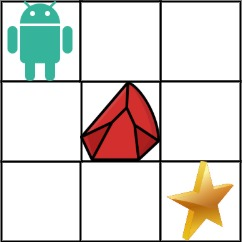
> 
> 输入：obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
> 
> 输出：2
>
>  解释：3x3 网格的正中间有一个障碍物。
>
> 从左上角到右下角一共有 2 条不同的路径：
>
> 1. 向右 -> 向右 -> 向下 -> 向下
>
> 2. 向下 -> 向下 -> 向右 -> 向右
>
>    
> 示例 2：
> 
> 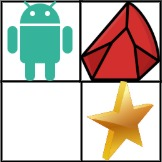
>
> 输入：obstacleGrid = [[0,1],[0,0]]
> 
>输出：1
>  
> 
> 提示：
> 
>
>  m == obstacleGrid.length
>
> n == obstacleGrid[i].length
>
> 1 <= m, n <= 100
>
> obstacleGrid[i][j] 为 0 或 1

In [164]:
def uniquePathsWithObstacles(obstacleGrid):
    if obstacleGrid[0][0] == 1:
        return 0
    
    m, n = len(obstacleGrid), len(obstacleGrid[0])
    dp = [[0] * n for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if obstacleGrid[i][j] == 0:
                if i == j == 0:
                    dp[i][j] =1
                else:
                    if i > 0:
                        up = dp[i - 1][j]
                    else:
                        up = 0

                    if j > 0:
                        left = dp[i][j - 1]
                    else:
                        left = 0
                    dp[i][j] = up + left
    return dp[-1][-1]
    
#obstacleGrid = [[0,1],[0,0]]
obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
print(uniquePathsWithObstacles(obstacleGrid))

2


In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        if obstacleGrid[0][0] == 1:
            return 0
        
        m, n = len(obstacleGrid), len(obstacleGrid[0])
        dp = [[0] * n for _ in range(m)]
        
        for i in range(m):
            for j in range(n):
                if obstacleGrid[i][j] == 0:
                    if i == j == 0:
                        dp[i][j] =1
                    else:
                        if i > 0:
                            up = dp[i - 1][j]
                        else:
                            up = 0
    
                        if j > 0:
                            left = dp[i][j - 1]
                        else:
                            left = 0
                        dp[i][j] = up + left
        return dp[-1][-1]

## Q11: 343. 整数拆分  
https://leetcode.cn/problems/integer-break/description/
> 给定一个正整数 n ，将其拆分为 k 个 正整数 的和（ k >= 2 ），并使这些整数的乘积最大化。
> 
> 返回 你可以获得的最大乘积 。
> 
>  
> 
> 示例 1:
> 
> 输入: n = 2
> 输出: 1
> 解释: 2 = 1 + 1, 1 × 1 = 1。
> 示例 2:
> 
> 输入: n = 10
> 输出: 36
> 解释: 10 = 3 + 3 + 4, 3 × 3 × 4 = 36。
>  
> 
> 提示:
> 
> 2 <= n <= 58

In [172]:
def integerBreak(n):
    res = 0
    for i in range(1, n+1):
        for j in range(1, n+1):
            if i + j == n:
                res = max(res, i * j)
    return res
    
n = 10
print(integerBreak(n))

25


In [ ]:
class Solution:
    def integerBreak(self, n: int) -> int:
        

## Q12: 96. 不同的二叉搜索树 
https://leetcode.cn/problems/unique-binary-search-trees/description/

# 5. 完全背包
# 6. 打家劫舍
# 7. 股票问题
# 8. 子序列问题